# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Roy Elkabetz| roy-e@campus.technion.ac.il| 300427259|



### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw2_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw2_id1_id2.zip` with content:
        * `ee046211_hw2_id1_id2.ipynb` - the code tasks
        * `ee046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - Backpropagation By Hand](#-Question-2---Backpropagation-By-Hand)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivarinace](#-Question-5--Equivarinace)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - FashionMNIST Deep Classifer](#-Task-2---FashionMNIST-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \mathcal{R}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 1 - <span style="color: HotPink">Solution</span>
---
Let us start by calculating $\overline{\mathcal{R}}(w_\mu)$ from $\mathcal{R}(w_\mu)$. First we simplify $\mathcal{R}(w_\mu)$

$$
\begin{align}
    \mathcal{R}(w_{\mu}) &= ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2\\
                         &= \left((H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon\right)\left((H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon\right)^T
\end{align}
$$












%%%%%%%%%%%%%%%%%%
<!-- $$
\begin{align}
\int_0^1 \nabla f(y + t(x-y))^T(x-y) dt &= \frac{f(y + t(x-y))}{(x-y)}(x-y)|_0^1\\
                                        &= f(y + t(x-y))|_0^1\\
                                        &= f(y + 1(x-y)) - f(y + 0(x-y))\\
                                        &= f(x) - f(y)\\
\end{align}
$$

So 
$$
\begin{align}
    \vert f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2)\vert &= \vert\int_0^1 \nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2) dt -\nabla f(w_2)^T (w_1-w_2)\vert\\
                                              &= \vert\int_0^1 \nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2) dt -\int_0^1\nabla f(w_2)^T (w_1-w_2)dt\vert\\
                                              &= \vert\int_0^1 \left(\nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2)  -\nabla f(w_2)^T (w_1-w_2)\right)dt\vert\\
                  \color{#FE6F5E}{\text{(I)}} &\leq \int_0^1 \vert\left(\nabla f(w_2 + t(w_1-w_2))^T  -\nabla f(w_2)^T \right)(w_1-w_2)\vert dt\\
                 \color{#FE6F5E}{\text{(II)}} &\leq \int_0^1 \Vert\nabla f(w_2 + t(w_1-w_2))^T  -\nabla f(w_2)^T \Vert\cdot \Vert w_1-w_2\Vert dt\\
                \color{#FE6F5E}{\text{(III)}} &\leq \int_0^1 \beta\Vert w_2 + t(w_1-w_2)  -w_2 \Vert\cdot \Vert w_1-w_2\Vert dt\\
                                              &= \int_0^1 \beta\Vert t(w_1-w_2) \Vert dt\cdot \Vert w_1-w_2\Vert\\
                                              &= \beta\int_0^1  t dt\cdot \Vert w_1-w_2\Vert^2\\
                                              &= \frac{\beta}{2} t^2|_0^1  \cdot \Vert w_1-w_2\Vert^2\\
                                              &= \frac{\beta}{2} \Vert w_1-w_2 \Vert^2\\
\end{align}
$$
where in $\color{#FE6F5E}{\text{(I)}}$ we used a simple integral inequality 
$$
\vert \int f(t)dt\vert\leq\int\vert f(t)\vert dt
$$
in $\color{#FE6F5E}{\text{(II)}}$ we used the Cauchy–Schwarz inequality
$$
\vert \left\langle v, u \right\rangle\vert \leq \Vert v\Vert \Vert u\Vert
$$
and in $\color{#FE6F5E}{\text{(III)}}$ we used the $\beta$-smoothness (Lipschitz) property.               -->

<div style="text-align: right"> $\color{#4CBB17}{\rule{1.7ex}{1.7ex}}$ </div>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Backpropagation By Hand
---
Consider the following network:
<img src="https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/backprop_by_hand_ex1.png" style="height:300px">

We will work with one sample for this example, but it can be extended to mini-batches.

* Input: $x = \begin{bmatrix} 1 \\ 4 \\ 5 \end{bmatrix} \in \mathbb{R}^3$
* Output (target): $ t = \begin{bmatrix} 0.1 \\ 0.05 \end{bmatrix} \in \mathbb{R}^2 $
* Number of Hidden Layers: 1
* Activation: Sigmoid for both hidden and output layers
* Loss Functions: MSE

We initialize the weights and biases to random values as follows:
<img src="https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/backprop_by_hand_ex2.png" style="height:300px">

1. Perform one forward pass and calculate the MSE.
2. Perform backpropagation (one backward pass, i.e., calculate the gradients).
3. With a learning rate of $\alpha = 0.01$, what are the new values of the weights after performing the forward pass and backward pass (assume we use SGD)?

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 2 - <span style="color: HotPink">Solution</span>
---

1. We notice that it is possible to write the given network in a vectorized notaion as follows

$
\begin{align}
O &= \phi\left(W_2^T \phi\left(W_1^T X + b_1\right) + b_2\right)
\end{align}
$

where $O\in \mathbb{R^{2\times 1}}$ is the output of the network, $X\in \mathbb{R^{3\times 1}}$ is the input and $W_l,b_l$ are the weights which are given (from the figure above) by 

$
\begin{align}
    W_1 = 
\left(\begin{array}{ccc}
0.1 & 0.2 \\
0.3 & 0.4 \\
0.5 & 0.6
\end{array}\right)
,\quad
W_2 = 
\left(\begin{array}{cc}
0.7 & 0.8 \\
0.9 & 0.1 
\end{array}\right)
,\quad
b_1 = 
\left(\begin{array}{c}
0.5\\
0.5
\end{array}\right)
,\quad
b_2 = 
\left(\begin{array}{c}
0.5\\
0.5
\end{array}\right)
\end{align}
$

Now we can calculate the output of the network, $O$, using a forward pass, lets start by calculating the hidden layer,
$h$, values:

$
\begin{align}
    h &= \phi\left( W_1^T X +b_1\right)\\
      &= \phi\left(
        \left(\begin{array}{cc}
            0.1 & 0.3 & 0.5 \\
            0.2 & 0.4 & 0.6
        \end{array}\right)
        \left[\begin{array}{c}
            1\\
            4\\
            5
        \end{array}\right]+
        \left(\begin{array}{c}
            0.5\\
            0.5
        \end{array}\right)
        \right)\\\\
      &=\phi\left(
        \left(\begin{array}{c}
            4.3\\
            5.3
        \end{array}\right)
        \right)\\\\
      &=\left(\begin{array}{c}
            \phi(4.3)\\
            \phi(5.3)
        \end{array}\right)
\end{align}
$

where $\phi(x) = \frac{1}{1+\exp(-x)}$. In the same way lets calculate $O$

$
\begin{align}
    O &= \phi\left( W_2^T h +b_2\right)\\
      &= \phi\left(
        \left(\begin{array}{cc}
            0.7 & 0.9\\
            0.8 & 0.1
        \end{array}\right)
        \left(\begin{array}{c}
            \phi(4.3)\\
            \phi(5.3)
        \end{array}\right)+
        \left(\begin{array}{c}
            0.5\\
            0.5
        \end{array}\right)
        \right)\\\\
      &=\left(\begin{array}{c}
            \phi(0.7\phi(4.3)+0.9\phi(5.3)+0.5)\\
            \phi(0.8\phi(4.3)+0.1\phi(5.3)+0.5)
        \end{array}\right)
\end{align}
$

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Input
X = np.array([1., 4., 5.])

# Weights
W1 = np.array([[0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6]])
b1 = np.array([0.5, 0.5])

W2 = np.array([[0.7, 0.8],
               [0.9, 0.1]])
b2 = np.array([0.5, 0.5])

# calculating the hidden layer values
h = sigmoid(np.transpose(W1) @ X + b1)

# calculating the output layer values
O = sigmoid(np.transpose(W2) @ h + b2)

print('h = {}'.format(h))
print('O = {}'.format(O))

h = [0.98661308 0.9950332 ]
O = [0.88955061 0.80039961]


So we get that
$
O = \left(\begin{array}{c}
            \phi(0.7\phi(4.3)+0.9\phi(5.3)+0.5)\\
            \phi(0.8\phi(4.3)+0.1\phi(5.3)+0.5)
        \end{array}\right)
    =\left(\begin{array}{c}
             0.88955061\\
             0.80039961
         \end{array}\right)
$

The MSE is given by

$
E_{MSE} = \Vert O-t \Vert_2^2
    = \Vert
         \left(\begin{array}{c}
             0.88955061\\
             0.80039961
         \end{array}\right)-
         \left(\begin{array}{c}
             0.1\\
             0.05
         \end{array}\right)
      \Vert_2^2
$

In [ ]:
# target output
t = np.array([0.1, 0.05])

mse = np.sum(np.power(t - O, 2))
print('MSE = {}'.format(mse))

MSE = 1.186489743807772


So we get
$ E_{MSE} = 1.186 $ .

2. Now let us perform a single backward pass and calculate the gradients. For that I will use the
same notation as in the tutorial where we enumerate the layers and the activations as follows:

$
\begin{align}
    Z^{(0)}&=X\\
    Z^{(1)}&=W_1^TZ^{(0)}+b_1\\
    Z^{(2)}&=\phi(Z^{(1)})\color{red}{\quad\,\,\equiv h}\\
    Z^{(3)}&=W_2^TZ^{(2)}+b_2\\
    Z^{(4)}&=\phi(Z^{(3)})\color{red}{\quad\,\,\equiv O}\\
    Z^{(5)}&=( Z^{(4)} - t)^2\\
    Z^{(6)}&= \sum_{i}Z^{(5)}_i\color{red}{\equiv E_{MSE}}\\
\end{align}
$

the numerical values at each step are

$
\begin{align}
Z^{(0)}=\left(\begin{array}{c}
            1\\
            4\\
            5
        \end{array}\right),\quad
Z^{(1)}=\left(\begin{array}{c}
            4.3\\
            5.3
        \end{array}\right),\quad
Z^{(2)}=\left(\begin{array}{c}
            0.987\\
            0.995
        \end{array}\right),\quad
Z^{(3)}=\left(\begin{array}{c}
            2.086\\
            1.389
        \end{array}\right),\quad
Z^{(4)}=\left(\begin{array}{c}
            0.89\\
            0.8
        \end{array}\right),\quad
Z^{(5)}=\left(\begin{array}{c}
            0.623\\
            0.563
        \end{array}\right),\quad
Z^{(6)}=1.186
\end{align}
$

then, we would like to calculate $\frac{\partial E_{MSE}}{\partial W_l}, \frac{\partial E_{MSE}}{\partial b_l}$ so we
can later update the weights using SGD.

In [ ]:
# computing all Z values
Z0 = X
Z1 = np.transpose(W1) @ Z0 + b1
Z2 = sigmoid(Z1)
Z3 = np.transpose(W2) @ Z2 + b2
Z4 = sigmoid(Z3)
Z5 = np.power(Z4 - t, 2)
Z6 = np.sum(Z5)

print('The numerical values of each step are:')
print('\nZ0 = {}\nZ1 = {}\nZ2 = {}\nZ3 = {}\nZ4 = {}\nZ5 = {}\nZ6 = {}'.format(Z0, Z1, Z2, Z3, Z4, Z5, Z6))

The numerical values of each step are:

Z0 = [1. 4. 5.]
Z1 = [4.3 5.3]
Z2 = [0.98661308 0.9950332 ]
Z3 = [2.08615904 1.38879379]
Z4 = [0.88955061 0.80039961]
Z5 = [0.62339017 0.56309957]
Z6 = 1.186489743807772


First we compute each partial derivative term

$
\begin{align}
    \frac{\partial Z^{(6)}}{\partial Z^{(5)}}&=1\\
    \frac{\partial Z^{(5)}}{\partial Z^{(4)}}&=2(Z^{(4)}-t)\\
    \frac{\partial Z^{(4)}}{\partial Z^{(3)}}&=\phi(Z^{(3)})(1-\phi(Z^{(3)}))\\
    \frac{\partial Z^{(3)}}{\partial Z^{(2)}}&=W_2^T\\
    \frac{\partial Z^{(3)}}{\partial W_2}&=Z^{(2)}\\
    \frac{\partial Z^{(3)}}{\partial b_2}&=1\\
    \frac{\partial Z^{(2)}}{\partial Z^{(1)}}&=\phi(Z^{(1)})(1-\phi(Z^{(1)}))\\
    \frac{\partial Z^{(1)}}{\partial Z^{(0)}}&=W_1^T\\
    \frac{\partial Z^{(1)}}{\partial W_1}&=Z^{(0)}\\
    \frac{\partial Z^{(1)}}{\partial b_1}&=1\\
\end{align}
$

now say we would like to calculate the partial derivative of the error $E$ with respect
to the $(1, 1)$ entry of $W^2$ which is $W^2_{11}$ (from now on we will write the number of
 the weights matrices as a superscript in order to save the subscript to matrix indices).
So

$
\begin{align}
    \frac{\partial E}{\partial W^2_{11}} &= \frac{\partial Z^{(6)}}{\partial W^2_{11}}\\
    &= \frac{\partial Z^{(6)}}{\partial Z^{(5)}_1}\cdot\frac{\partial Z^{(5)}_1}{\partial Z^{(4)}_1}\cdot\frac{\partial Z^{(4)}_1}{\partial Z^{(3)}_1}\cdot\frac{\partial Z^{(3)}_1}{\partial W^2_{11}}\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot\frac{\partial }{\partial W^2_{11}}(W^2_{11}Z^{(2)}_1+W^2_{21}Z^{(2)}_2+b^2_1)\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot Z^{(2)}_1\\
    &= 1\cdot 1.57910123\cdot 0.09825032\cdot 0.987\\
    &= 0.15307026\\
\end{align}
$

in the same way

$
\begin{align}
    \frac{\partial E}{\partial W^2_{21}} &= \frac{\partial Z^{(6)}}{\partial W^2_{21}}\\
    &= \frac{\partial Z^{(6)}}{\partial Z^{(5)}_1}\cdot\frac{\partial Z^{(5)}_1}{\partial Z^{(4)}_1}\cdot\frac{\partial Z^{(4)}_1}{\partial Z^{(3)}_1}\cdot\frac{\partial Z^{(3)}_1}{\partial W^2_{21}}\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot\frac{\partial }{\partial W^2_{11}}(W^2_{11}Z^{(2)}_1+W^2_{21}Z^{(2)}_2+b^2_1)\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot Z^{(2)}_2\\
    &= 1\cdot 1.57910123\cdot 0.09825032\cdot 0.995\\
    &= 0.15437661\\
\end{align}
$

and

$
\begin{align}
    \frac{\partial E}{\partial b^2_{1}} &= \frac{\partial Z^{(6)}}{\partial b^2_{1}}\\
    &= \frac{\partial Z^{(6)}}{\partial Z^{(5)}_1}\cdot\frac{\partial Z^{(5)}_1}{\partial Z^{(4)}_1}\cdot\frac{\partial Z^{(4)}_1}{\partial Z^{(3)}_1}\cdot\frac{\partial Z^{(3)}_1}{\partial b^2_{1}}\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot\frac{\partial }{\partial W^2_{11}}(W^2_{11}Z^{(2)}_1+W^2_{21}Z^{(2)}_2+b^2_1)\\
    &= 1\cdot 2(Z^{(4)}_1 - t)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot 1\\
    &= 1\cdot 1.57910123\cdot 0.09825032\cdot 1\\
    &= 0.1551472\\
\end{align}
$

The other derivatives of $E$ with respect to $W^2_{12}, W^2_{22}, b^2_{2}$ are

$
\begin{align}
    \frac{\partial E}{\partial W^2_{12}} &=1\cdot 2(Z^{(4)}_2 - t)\cdot \phi(Z^{(3)}_2)(1-\phi(Z^{(3)}_2))\cdot Z^{(2)}_1=0.236558\\
    \frac{\partial E}{\partial W^2_{22}} &=1\cdot 2(Z^{(4)}_2 - t)\cdot \phi(Z^{(3)}_2)(1-\phi(Z^{(3)}_2))\cdot Z^{(2)}_2=0.238577\\
    \frac{\partial E}{\partial b^2_{2}} &=1\cdot 2(Z^{(4)}_2 - t)\cdot \phi(Z^{(3)}_2)(1-\phi(Z^{(3)}_2))\cdot 1=0.239768\\
\end{align}
$

Following similar steps lets calculate the derivatives of $E$ with respect to $W^1_{ij}, b^1_{ij}$

$
\begin{align}
   \frac{\partial E}{\partial W^1_{11}} &= \frac{\partial Z^{(6)}}{\partial W^1_{11}}\\
    &= \frac{\partial Z^{(6)}}{\partial Z^{(5)}}\cdot\frac{\partial Z^{(5)}}{\partial Z^{(4)}}\cdot\frac{\partial Z^{(4)}}{\partial Z^{(3)}}\cdot\frac{\partial Z^{(3)}}{\partial Z^{(2)}}\cdot\frac{\partial Z^{(2)}}{\partial Z^{(1)}}\cdot\frac{\partial Z^{(1)}}{\partial W^1_{11}}\\
    &= \left(\color{red}{\frac{\partial Z^{(6)}}{\partial Z^{(5)}_1}\cdot\frac{\partial Z^{(5)}_1}{\partial Z^{(4)}_1}\cdot\frac{\partial Z^{(4)}_1}{\partial Z^{(3)}_1}\cdot\frac{\partial Z^{(3)}_1}{\partial Z^{(2)}_1}} +
    \color{green}{\frac{\partial Z^{(6)}}{\partial Z^{(5)}_2}\cdot\frac{\partial Z^{(5)}_2}{\partial Z^{(4)}_2}\cdot\frac{\partial Z^{(4)}_2}{\partial Z^{(3)}_2}\cdot\frac{\partial Z^{(3)}_2}{\partial Z^{(2)}_1}}\right)
    \cdot\left(\color{#F4C430}{\frac{\partial Z^{(2)}_1}{\partial Z^{(1)}_1}\cdot\frac{\partial Z^{(1)}_1}{\partial W^1_{11}}}\right)\\
\end{align}
$

Notice that there should be more terms in the derivation above, but I ignored all the terms
 which are zero, i.e. $\frac{\partial Z^{(4)}_1}{\partial Z^{(3)}_2}$ because they have no contribution.

Also, in the derivation above I colored the terms in a compatible way to the figure below for it would be easier to read.
Each singly colored bulk of terms corresponds to the computation in the reverse direction of the line with the same color.

Finally, by inserting numerical values inplace of symbolic terms we get

$
\begin{align}
    \frac{\partial E}{\partial W^1_{11}} &= \left(\color{red}{1\cdot 2(Z^{(4)}_1-t_1)\cdot \phi(Z^{(3)}_1)(1-\phi(Z^{(3)}_1))\cdot W^2_{11}} +
    \color{green}{1\cdot 2(Z^{(4)}_2-t_2)\cdot \phi(Z^{(3)}_2)(1-\phi(Z^{(3)}_2))\cdot W^2_{12}}\right)
    \cdot\left(\color{#F4C430}{\phi(Z^{(1)}_1)(1-\phi(Z^{(1)}_1))\cdot Z^{(0)}_1}\right)\\
     &= \left(\color{red}{1\cdot 1.57910123\cdot 0.09825032\cdot 0.7} +
    \color{green}{1\cdot 1.50079922\cdot 0.15976008\cdot 0.8}\right)
    \cdot\left(\color{#F4C430}{0.01320771\cdot 1}\right)\\
    &= 0.003967824
\end{align}
$

Exactly in the same way we can compute all other derivatives of $E$ with respect to $W^1_{ij}, b^1_{ij}$. But, because
it will take a lot of time I won't write the computation explicitly but only
the final results. So

$
\begin{align}
    \frac{\partial E}{\partial W^1} &= \left(\begin{array}{cc} 0.00396782 & 0.00080858\\0.01587129 & 0.00323431\\ 0.01983912 & 0.00404289\\\end{array}\right)\\\\
    \frac{\partial E}{\partial b^1} &= \left(\begin{array}{c} 0.00396782 & 0.00080858 \end{array}\right)
\end{align}
$

while the derivatives with respect to $W^2$ and $b^2$ are

$
\begin{align}
    \frac{\partial E}{\partial W^2} &= \left(\begin{array}{cc} 0.15307026 & 0.23655804\\ 0.15437661 & 0.23857692\\\end{array}\right)\\\\
    \frac{\partial E}{\partial b^2} &= \left(\begin{array}{c} 0.1551472 & 0.2397678 \end{array}\right)
\end{align}
$

and we are done with this part. Next we need to cacluate a single SGD step.

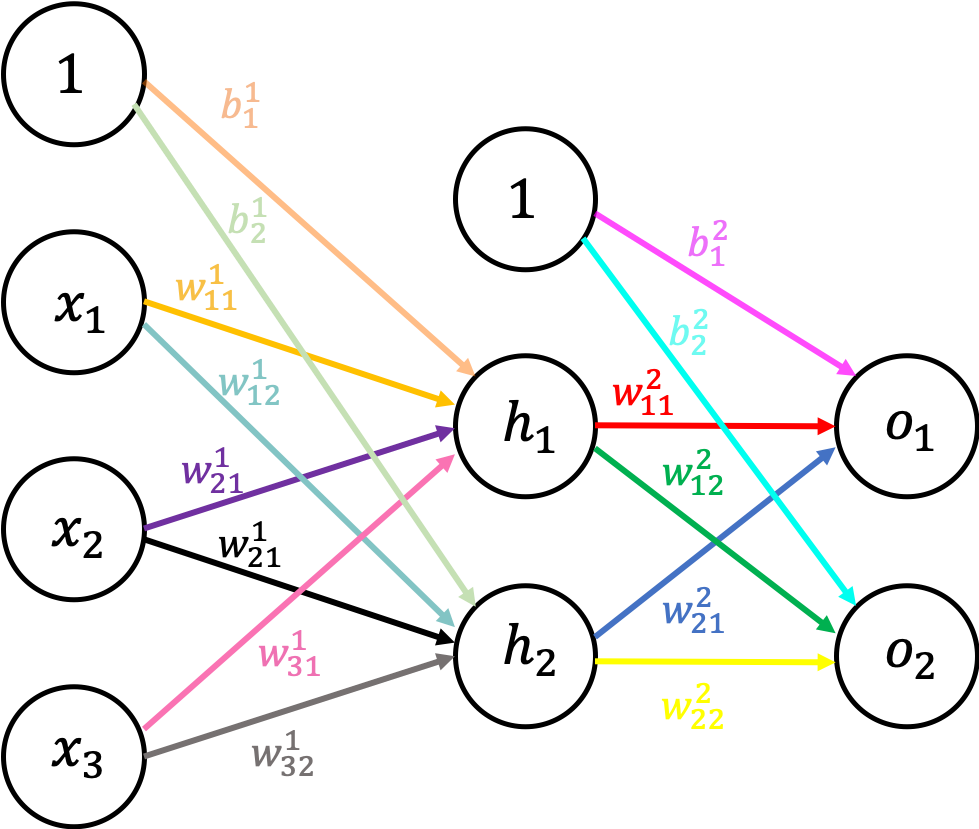

In [ ]:
from IPython.display import Image
Image(filename='hw2_q2_net.png')

In [ ]:
# numerical values of all local terms
dZ6dZ5 = np.ones(2)
dZ5dZ4 = 2*(Z4-t)
dZ4dZ3 = sigmoid(Z3) * (1 - sigmoid(Z3))
dZ3dZ2 = np.transpose(W2)
dZ3dW2 = Z2
dZ3db2 = np.ones(2)
dZ2dZ1 = sigmoid(Z1) * (1 - sigmoid(Z1))
dZ1dZ0 = np.transpose(W1)
dZ1dW1 = Z0
dZ1db1 = np.ones(2)

print('ALL THE LOCAL PARTIAL DERIVATIVES ARE:')
print('\ndZ6/dZ5 = \n',dZ6dZ5)
print('\ndZ5/dZ4 = \n',dZ5dZ4)
print('\ndZ4/dZ3 = \n',dZ4dZ3)
print('\ndZ3/dZ2 = \n',dZ3dZ2)
print('\ndZ3/dW2 = \n',dZ3dW2)
print('\ndZ3/db2 = \n',dZ3db2)
print('\ndZ2/dZ1 = \n',dZ2dZ1)
print('\ndZ1/dZ0 = \n',dZ1dZ0)
print('\ndZ1/dW1 = \n',dZ1dW1)
print('\ndZ1/db1 = \n',dZ1db1)

# calculating dE/dW2, dE/dB2 manually for conformation
dEdW211 = dZ6dZ5[0] * dZ5dZ4[0] * dZ4dZ3[0] * dZ3dW2[0]
dEdW221 = dZ6dZ5[0] * dZ5dZ4[0] * dZ4dZ3[0] * dZ3dW2[1]
dEdb21 = dZ6dZ5[0] * dZ5dZ4[0] * dZ4dZ3[0] * dZ3db2[0]

dEdW212 = dZ6dZ5[1] * dZ5dZ4[1] * dZ4dZ3[1] * dZ3dW2[0]
dEdW222 = dZ6dZ5[1] * dZ5dZ4[1] * dZ4dZ3[1] * dZ3dW2[1]
dEdb22 = dZ6dZ5[1] * dZ5dZ4[1] * dZ4dZ3[1] * dZ3db2[1]

# calculating dE/dW2, dE/dB2 in a vectorcall way
dEdW2 = np.reshape(dZ6dZ5 * dZ5dZ4 * dZ4dZ3, (2, -1)) * np.reshape(dZ3dW2, (-1, 2))
dEdb2 = dZ6dZ5 * dZ5dZ4 * dZ4dZ3 * dZ3db2

print('\n')
print('dE/dW2{11} = ',dEdW211)
print('dE/dW2{21} = ',dEdW221)
print('dE/db2{1} = ',dEdb21)
print('dE/dW2{12} = ',dEdW212)
print('dE/dW2{22} = ',dEdW222)
print('dE/db2{2} = ',dEdb22)

print('\ndE/dW2 = \n',dEdW2)
print('\ndE/db2 = \n',dEdb2)



ALL THE LOCAL PARTIAL DERIVATIVES ARE:

dZ6/dZ5 = 
 [1. 1.]

dZ5/dZ4 = 
 [1.57910123 1.50079922]

dZ4/dZ3 = 
 [0.09825032 0.15976008]

dZ3/dZ2 = 
 [[0.7 0.9]
 [0.8 0.1]]

dZ3/dW2 = 
 [0.98661308 0.9950332 ]

dZ3/db2 = 
 [1. 1.]

dZ2/dZ1 = 
 [0.01320771 0.00494213]

dZ1/dZ0 = 
 [[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

dZ1/dW1 = 
 [1. 4. 5.]

dZ1/db1 = 
 [1. 1.]


dE/dW2{11} =  0.15307025681174763
dE/dW2{21} =  0.15437661425721483
dE/db2{1} =  0.1551471996243106
dE/dW2{12} =  0.23655804425614918
dE/dW2{22} =  0.23857691695445035
dE/db2{2} =  0.23976779603944962

dE/dW2 = 
 [[0.15307026 0.15437661]
 [0.23655804 0.23857692]]

dE/db2 = 
 [0.1551472 0.2397678]


In [ ]:
# calculating two derivatives manually (just for conformation)
dEdW111 = (dZ6dZ5[0] * dZ5dZ4[0] * dZ4dZ3[0] * dZ3dZ2[0, 0] +
           dZ6dZ5[1] * dZ5dZ4[1] * dZ4dZ3[1] * dZ3dZ2[1, 0]) * \
          (dZ2dZ1[0] * dZ1dW1[0])
print('\n dE/dW1{11} = ',dEdW111)

dEdW121 = (dZ6dZ5[0] * dZ5dZ4[0] * dZ4dZ3[0] * dZ3dZ2[0, 0] +
           dZ6dZ5[1] * dZ5dZ4[1] * dZ4dZ3[1] * dZ3dZ2[1, 0]) * \
          (dZ2dZ1[0] * dZ1dW1[1])
print('\n dE/dW1{21} = ',dEdW121)

# calculating dE/dW1, dE/db1 in a vectorcall way
dEdZ2 = dZ4dZ3 * dZ5dZ4 * dZ6dZ5 @ dZ3dZ2
dEdW1 = np.reshape(dEdZ2 * dZ2dZ1, (2, -1)) * np.reshape(dZ1dW1, (-1, 3))
dEdb1 = (dZ4dZ3 * dZ5dZ4 * dZ6dZ5 @ dZ3dZ2) * dZ2dZ1 * dZ1db1

print('\ndE/dZ2 = \n', dEdZ2)
print('\ndE/dW1 = \n', dEdW1)
print('\ndE/db1 = \n', dEdb1)


 dE/dW1{11} =  0.003967823744803043

 dE/dW1{21} =  0.01587129497921217

dE/dZ2 = 
 [0.30041728 0.16360926]

dE/dW1 = 
 [[0.00396782 0.01587129 0.01983912]
 [0.00080858 0.00323431 0.00404289]]

dE/db1 = 
 [0.00396782 0.00080858]


3. For learning rate $\alpha = 0.01$ let us compute the new weights with a single SGD step following

$
\begin{align}
    W_{(step = 1)} = W_{(step = 0)} - \alpha\nabla_W E(X,t)
\end{align}
$

so

$
\begin{align}
    W_{(step = 1)}^1 &= W_{(step = 0)}^1 - \alpha \frac{\partial E(X,t)}{\partial W^1} = \left(\begin{array}{cc} 0.09996032 &0.19999191\\0.29984129 &0.39996766\\ 0.49980161 &0.59995957\\\end{array}\right)\\\\
\end{align}
$

and

$
\begin{align}
    b_{(step = 1)}^1 &= b_{(step = 0)}^1 - \alpha \frac{\partial E(X,t)}{\partial b^1}
                     =  \left(\begin{array}{c} 0.49996032 \\0.49999191\\\end{array}\right)
\end{align}
$

and

$
\begin{align}
    W_{(step = 1)}^2 &= W_{(step = 0)}^2 - \alpha \frac{\partial E(X,t)}{\partial W^2}
                     =  \left(\begin{array}{cc} 0.6984693 & 0.79763442\\ 0.89845623 & 0.09761423\\\end{array}\right)
\end{align}
$

and finally

$
\begin{align}
    b_{(step = 1)}^2 &= b_{(step = 0)}^2 - \alpha \frac{\partial E(X,t)}{\partial b^2}
                     =  \left(\begin{array}{c} 0.49844853 \\0.49760232\\\end{array}\right)
\end{align}
$

and we are done with this horror.

In [ ]:
lr = 0.01

# calculating a single SGD step
W1_new = W1 - lr * np.transpose(dEdW1)
W2_new = W2 - lr * np.transpose(dEdW2)
b1_new = b1 - lr * np.transpose(dEdb1)
b2_new = b2 - lr * np.transpose(dEdb2)

print('\nW1_new = \n', W1_new)
print('\nb1_new = \n', b1_new)
print('\nW2_new = \n', W2_new)
print('\nb2_new = \n', b2_new)


W1_new = 
 [[0.09996032 0.19999191]
 [0.29984129 0.39996766]
 [0.49980161 0.59995957]]

b1_new = 
 [0.49996032 0.49999191]

W2_new = 
 [[0.6984693  0.79763442]
 [0.89845623 0.09761423]]

b2_new = 
 [0.49844853 0.49760232]


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown? Explain.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:300px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 3 - <span style="color: HotPink">Solution</span>
---
1.

a. The critical point in that case would be the point where the test error reaches its maximum value
which is at model size of approximately 200 for De-En and approximatly 290 for En-Fr.

b. In that case there are three critical points, one for each label noise percentage:
At 0% label noise the critical point is at a width parameter of 10 (where the test reaches its maximum),
for 10% label noise the critical point is at around width parameter of 12 and for 20% label noise its around a width
parameter of 14.

c. In that case we also have three different models, but this time test error is plot vs
the number of training epochs. We see that for small model the test error did not reach the
critical point. This is because the error is monotonically decreasing along the entire training process
so it is still in the classical regime. For an intermidiate model the critical point is around 1k epochs,
while for the large model the test error reaches a critical point around 80 epochs.

2.

a. In that case we can see that for both datasets, De-En and En-Fr, the double decent type
is a "model-wise" double decent because the behavior depends on the model embedding dimension (model size).

b. In that case the double decent type is some kind of "sample wise" double decent, although
it does not vary with the size of the training set, but it surly depends on the amount of
good training data, where we see that cleaner dataset (less noise) results in a smaller test error in the critical
double decent region.

c.
In the lase case we got an "epoch wise" double decent type where the critical region
is pushed later in the training process for smaller and smaller models, as we have seen in the
tutorial.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---

Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{d_{l-1}\mathbb{E}_{z\sim \mathcal{N}(0, 1)} \left[\varphi^2(z)\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

All the notations are the same as in the lecture slides.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 -Equivarinace
---

Recall from lecture 6:
A function $f: \mathcal{R}^d \to \mathcal{R}$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathcal{R}^{d\times d}$. Prove that $f_w:\mathcal{R}^d \to \mathcal{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer with $N$ neurons, each of size $M \times M \times D$, where $D$ is the number of filters. $stride=1, padding=2$ 
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | -  | -  | 
| ReLU |  - | -  |
| POOL2|  - | -  |
|CONV3-128 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-256 | - | -|
|ReLU | - | -|
|CONV3-256 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
| FC-4096|  - | -  |
| FC-4096|  - | -  |
| FC-1000|  - | -  |
| SOFTMAX|  - | -  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [1]:
!pip install torchviz

# imports for the practice (you can add more if you need)
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchviz
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=c91b2337832bd9ba85e4710919df6b69f86b2c73cc6e62f7df677b314cbba08d
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [ ]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
print(x.mean(), x.std())

tensor(nan) tensor(nan)


Your answers here

In [ ]:
"""
Your Code Here
"""

'\nYour Code Here\n'

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - FashionMNIST Deep Classifer
---
In this task you are goin to design and train your first neural network for classification.
1. Load the FashionMNIST dataset `torchvision.datasets.FashionMNIST` and display 6 images with their labels from the dataset.
2. Design a **MLP** to classify images from the FashionMNIST dataset. **You need to reach at least 85% accuracy on the test set, and 89% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations.
    * **Print** the test accuracy.

In [2]:
class AddGaussianNoise(object):
    """Add Gaussian noise to Pytorch's tensor"""
    def __init__(self, mean=0., std=1.):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + f'mean={self.mean}, std={self.std}'

In [3]:
MNIST_CHECKPOINT_DIR = 'checkpoints_MNIST'
MNIST_DATASET_DIR = 'datasets_MNIST'
MODEL_NAME = 'FashionMNIST_MLP'



# create checkpoint directory to save model results
if not os.path.isdir(MNIST_CHECKPOINT_DIR):
    os.mkdir(MNIST_CHECKPOINT_DIR)

In [4]:
def get_data_transform():
    """Define the data augmentation to apply on the train, validation and test"""

    train_transform = transforms.Compose([
        #transforms.RandomAffine(degrees=10),
        #transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.4914,), (0.2023,),),
        AddGaussianNoise(0., 0.4),
    ])

    valid_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914,), (0.2023,),),
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914,), (0.2023,),),
    ])

    return train_transform, valid_transform, test_transform

In [5]:
def get_dataset(train_transform, valid_transform, test_transform, data_dir):
    """Get the datasets for train, validation and test"""
    train_dataset = torchvision.datasets.FashionMNIST(
        root=data_dir, train=True, transform=train_transform, download=True
    )
    valid_dataset = torchvision.datasets.FashionMNIST(
        root=data_dir, train=True, transform=valid_transform, download=True
    )
    test_dataset  = torchvision.datasets.FashionMNIST(
        root=data_dir, train=False, transform=test_transform, download = True
    )

    return train_dataset, valid_dataset, test_dataset

In [6]:
def get_data_loader(batch_size, valid_size=0.2, data_dir=MNIST_DATASET_DIR):
    """Get the train, validation and test data loaders"""

    error_msg = "[!] valid_size should be in the range [0, 1]."
    assert ((valid_size >= 0) and (valid_size <= 1)), error_msg

    # get transform
    train_transform, valid_transform, test_transform = get_data_transform()

    # load dataset
    train_dataset, valid_dataset, test_dataset = get_dataset(
        train_transform, valid_transform, test_transform, data_dir
    )
    
    # split the data
    num_train = len(train_dataset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # shuffle
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    loader_settings = {
        'batch_size': batch_size,
        'num_workers': 1,
        'pin_memory': torch.cuda.is_available()
    }

    # get dataloader objects
    train_loader = DataLoader(
        train_dataset, sampler=train_sampler, **loader_settings
    )
    valid_loader = DataLoader(
        valid_dataset, sampler=valid_sampler, **loader_settings
    )
    test_loader = DataLoader(
        test_dataset, shuffle=False, **loader_settings
    )

    return train_loader, valid_loader, test_loader

In [7]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

1. First let us display the first 6 images in the training data set with their labels.

In [8]:
# load n images
train_transform, _, _ = get_data_transform()
train_set = torchvision.datasets.FashionMNIST("./data", download=True, 
                                              transform=train_transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=6, 
                                          shuffle=False)

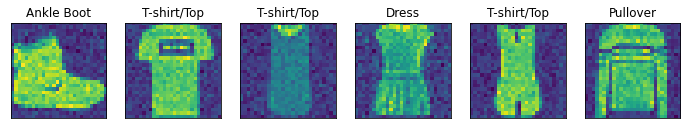

In [9]:
# let's see some of the images
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range - approximately...
    image = image / 2 + 0.5
    image = image.numpy()
    return np.squeeze(image)

dataiter = iter(trainloader)
images, labels = dataiter.next()

# plot images with labels
fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(output_label(labels[idx]))
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

2. Next let us train a model

In [10]:
# define the nn model
class FashionMnistMLP(nn.Module):
    "MLP for Fashion MNIST"
    def __init__(self, ):
        super(FashionMnistMLP, self).__init__()
        # define the layers of the MLP
        
        self.fc = nn.Sequential(
            
            # fc_1
            nn.Linear(784, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.05),
            
            # fc_2
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.05),
            
            # fc_3
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.05),
            
            # fc_4
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            
            # fc_5
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            
            # output
            nn.Linear(32, 10),
        )
            
        
    def forward(self, x):
        "forward pass"
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layers
        x = self.fc(x)
        
        return x

In [11]:
# define hyper-parmeters
batch_size = 32
learning_rate = 0.00005
num_epochs = 100
whight_decay = learning_rate/110

# Load the dataset
train_loader, valid_loader, test_loader = get_data_loader(batch_size, 
                                                          valid_size=0.2, 
                                                          )
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# model
model = FashionMnistMLP().to(device)

# optimizer
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate, 
                             amsgrad=True, 
                             weight_decay=whight_decay)

In [12]:
print(model)

# how many weights (trainable parameters) we have in our model?
dummy_model = FashionMnistMLP()
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)

FashionMnistMLP(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.05, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.05, inplace=False)
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.1, inplace=False)
    (15): Linear(in_features=32, out_features=10, bias=True)
  )
)
num trainable weights:  576810


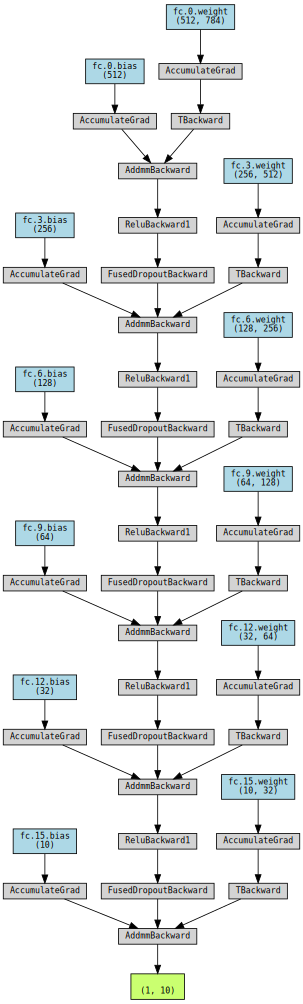

In [13]:
# visualize computational graph
x = torch.randn(1, 784).to(device) 
torchviz.make_dot(model(x), params=dict(model.named_parameters()))

In [14]:
# function to calcualte accuracy of the model - taken from the toturial
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1
                
    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [15]:
# dict for saving logs 
logger = {
    'loss': [],
    'train_acc': [],
    'valid_acc': [],
    'epochs': [],
}

In [16]:
# training loop
for epoch in range(1, num_epochs + 1):
    model.train() # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # forward + backward + optimize
        outputs = model(inputs)           # forward pass
        loss = criterion(outputs, labels) # calculate the loss
        optimizer.zero_grad()             # zero the parameter gradients
        loss.backward()                   # backpropagation
        optimizer.step()                  # update parameters
        
        # calculate loss
        running_loss += loss.data.item()
        running_loss /= len(trainloader)
        
    # Calculate training + valid sets accuracy
    train_accuracy, _ = calculate_accuracy(model, train_loader, device)
    valid_accuracy, _ = calculate_accuracy(model, valid_loader, device)
    log = "Epoch: {} | Loss: {:.6f} | Training accuracy: {:.3f}% | valid accuracy: {:.3f}% | ".format(epoch
    , running_loss, train_accuracy, valid_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save log into logger
    logger['loss'].append(running_loss)
    logger['train_acc'].append(train_accuracy)
    logger['valid_acc'].append(valid_accuracy)
    logger['epochs'].append(epoch)

    # save the model
    state = {
        'net': model.state_dict(),
        'epoch': epoch,
        'loss': loss,
        'train_acc': train_accuracy,
        'valid_acc': valid_accuracy,
    }
    torch.save(state, f'{MNIST_CHECKPOINT_DIR}/{MODEL_NAME}_{epoch}.pth')
print('==> Finished Training ...')

Epoch: 1 | Loss: 0.000077 | Training accuracy: 78.019% | valid accuracy: 78.242% | Epoch Time: 35.22 secs
Epoch: 2 | Loss: 0.000080 | Training accuracy: 81.406% | valid accuracy: 81.850% | Epoch Time: 34.90 secs
Epoch: 3 | Loss: 0.000053 | Training accuracy: 83.371% | valid accuracy: 83.633% | Epoch Time: 35.11 secs
Epoch: 4 | Loss: 0.000058 | Training accuracy: 84.079% | valid accuracy: 84.258% | Epoch Time: 35.06 secs
Epoch: 5 | Loss: 0.000041 | Training accuracy: 84.925% | valid accuracy: 84.950% | Epoch Time: 34.93 secs
Epoch: 6 | Loss: 0.000039 | Training accuracy: 85.600% | valid accuracy: 85.542% | Epoch Time: 35.02 secs
Epoch: 7 | Loss: 0.000048 | Training accuracy: 86.179% | valid accuracy: 85.983% | Epoch Time: 34.71 secs
Epoch: 8 | Loss: 0.000028 | Training accuracy: 85.769% | valid accuracy: 85.233% | Epoch Time: 34.74 secs
Epoch: 9 | Loss: 0.000026 | Training accuracy: 86.967% | valid accuracy: 86.658% | Epoch Time: 34.35 secs
Epoch: 10 | Loss: 0.000060 | Training accuracy

Test accuracy: 89.47


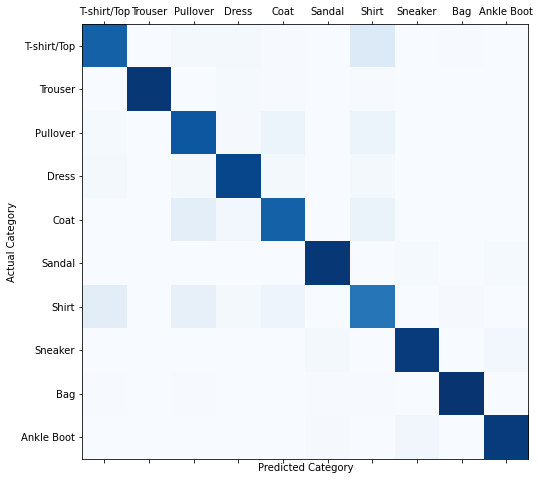

In [17]:
# load saved model
model = FashionMnistMLP().to(device)
state = torch.load(f'{MNIST_CHECKPOINT_DIR}/{MODEL_NAME}_{num_epochs - 1}.pth', map_location=device)
model.load_state_dict(state['net'])

# calculte test accuracy
test_accuracy, confusion_matrix = calculate_accuracy(model, test_loader, device)
print('Test accuracy: {}'.format(test_accuracy))

CLASSES = {
    0: 'T-shirt/Top', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt', 
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}


# plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), CLASSES.values())
plt.xlabel('Predicted Category')
plt.xticks(range(10), CLASSES.values())
plt.show()

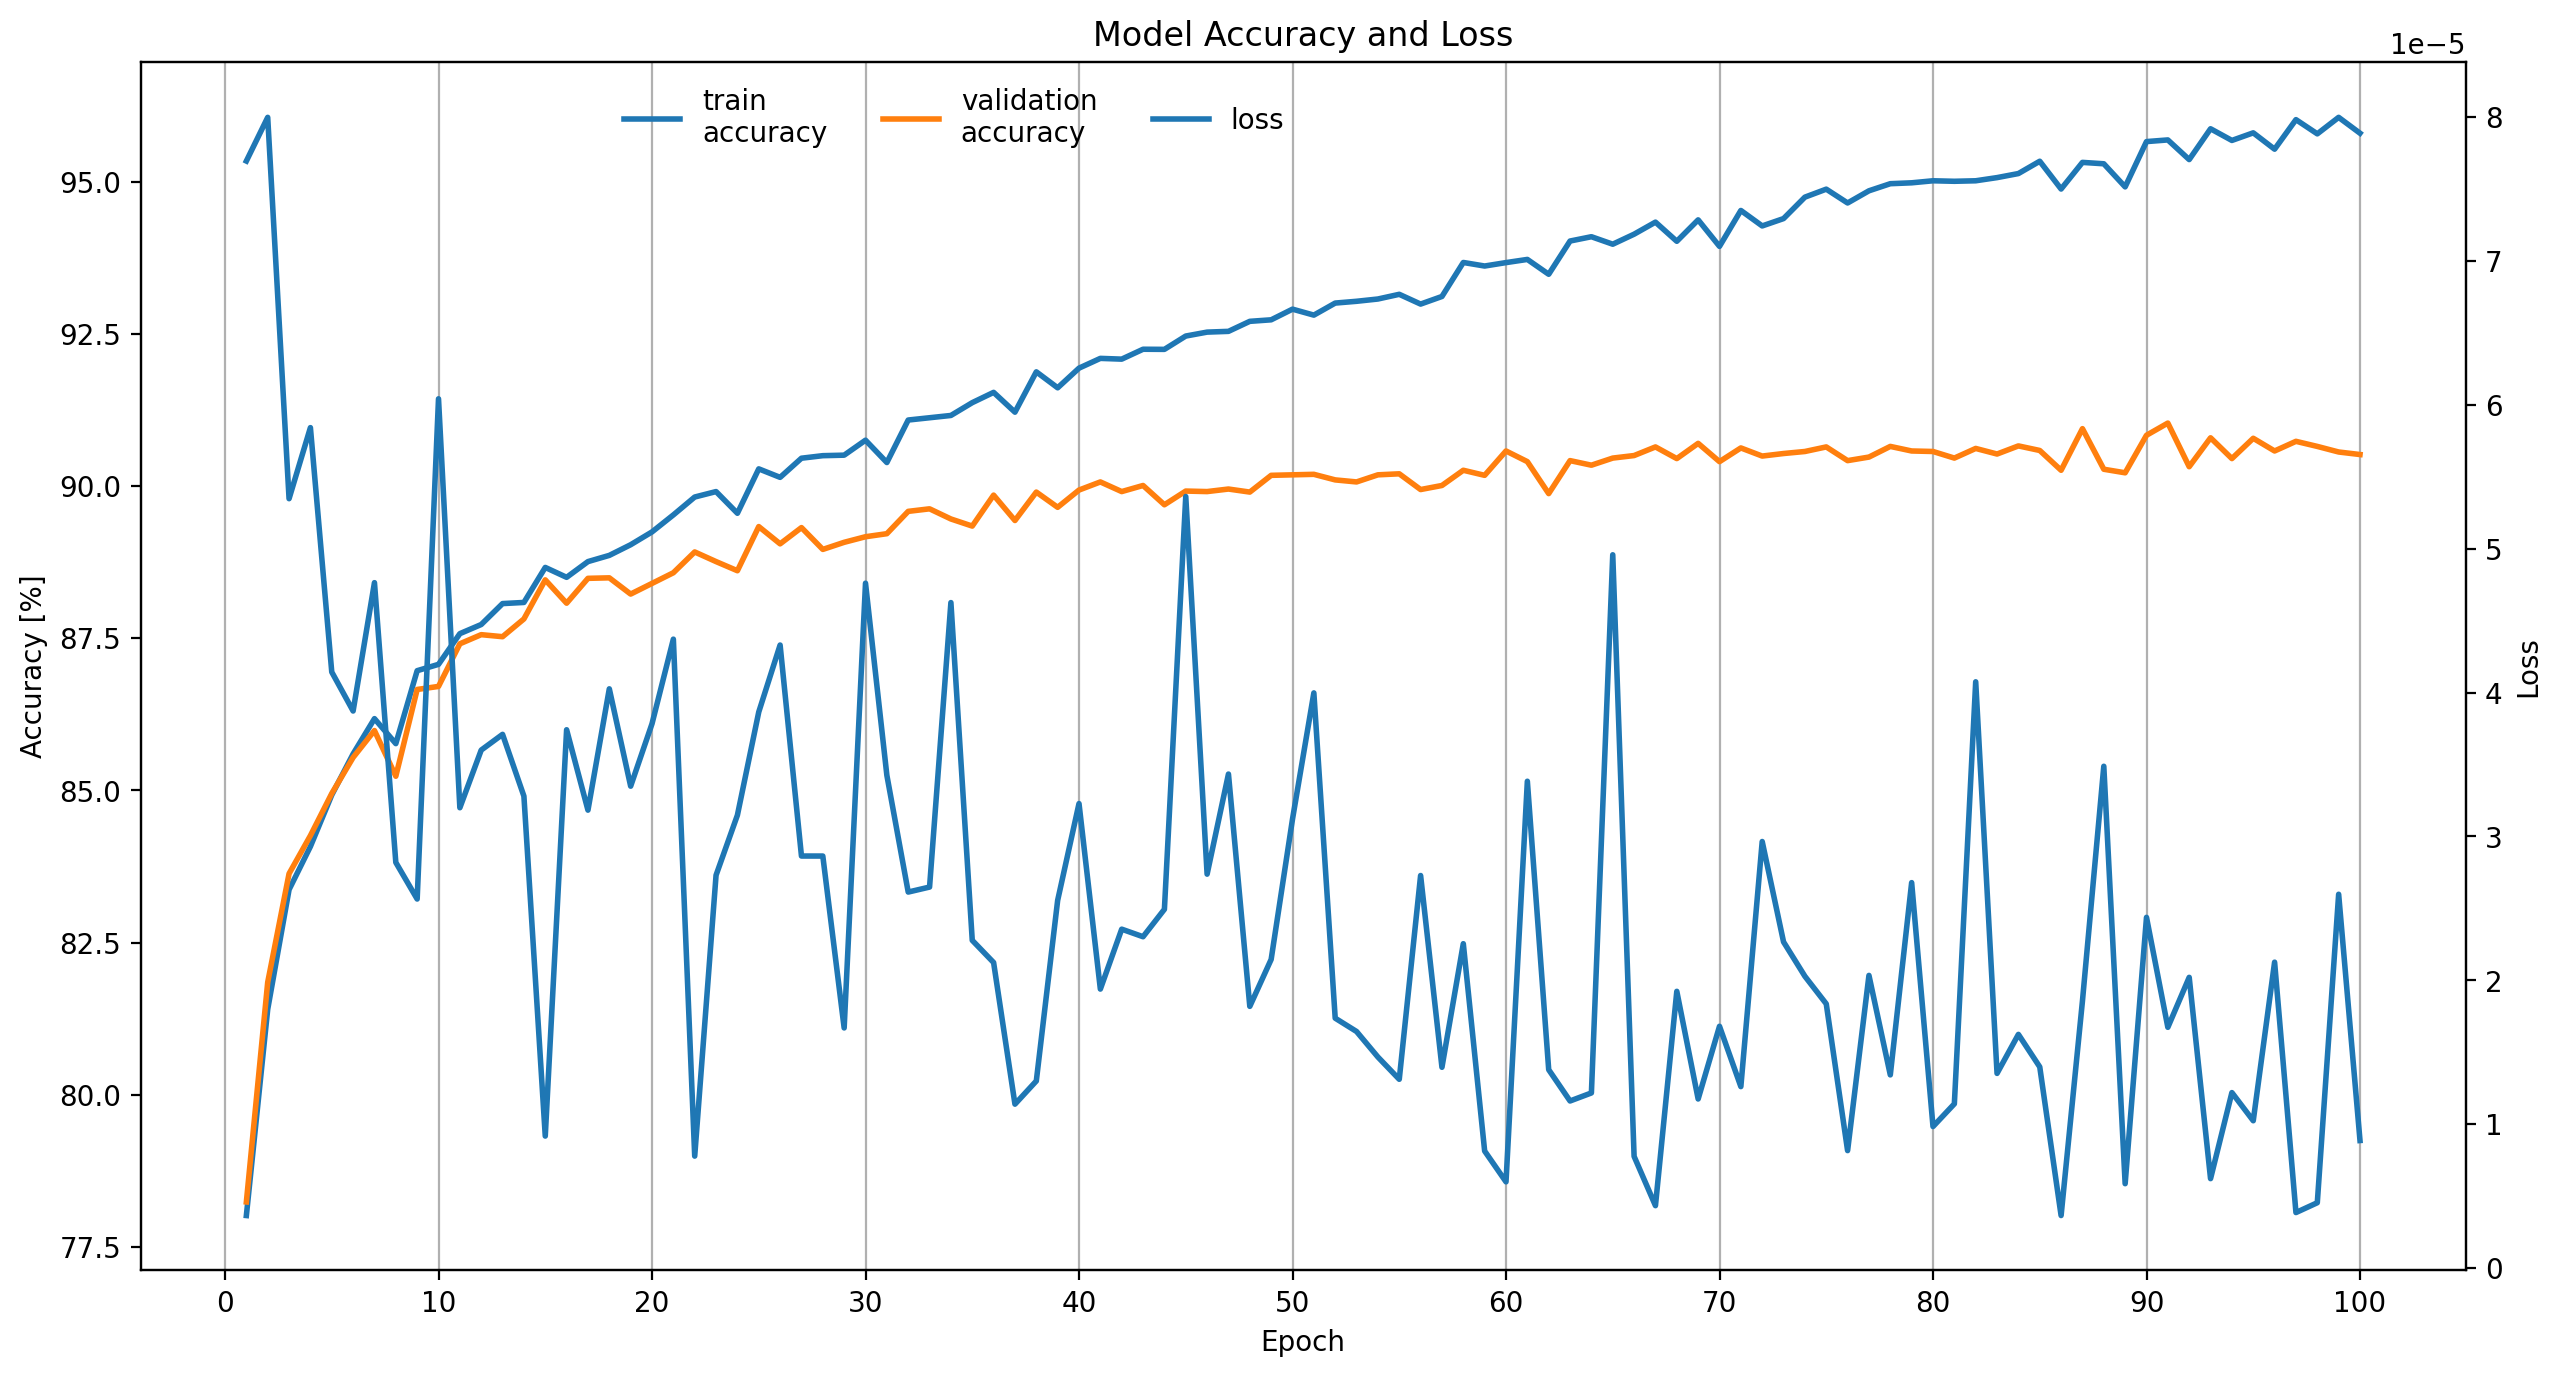

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15,8), dpi=200)
fig.patch.set_facecolor('white')

# plot accuracy
p1 = ax.plot(logger['epochs'], logger['train_acc'], linewidth=2, label='train\naccuracy')
p2 = ax.plot(logger['epochs'], logger['valid_acc'], linewidth=2, label='validation\naccuracy')
ax.set_xticks(range(0, num_epochs + 1, 10))
ax.set_xticklabels(range(0, num_epochs + 1, 10))
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy [%]')
ax.set_title('Model Accuracy and Loss')
ax.xaxis.grid()
ax1 = ax.twinx()
ax1.set_ylabel('Loss')
p3 = ax1.plot(logger['epochs'], logger['loss'], linewidth=2, label='loss')

# Add legend
lns = p1 + p2 + p3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', ncol=3, frameon=False, bbox_to_anchor=(0.35, 1.0))

2. So I trained a MLP network with the next architecture,


**Architecture:**

- Fully-conected ($784\to512$)
- ReLU
- Dropout ($5$%)
- Fully-conected ($512\to256$)
- ReLU
- Dropout ($5$%)
- Fully-conected ($256\to128$)
- ReLU
- Dropout ($5$%)
- Fully-conected ($128\to64$)
- ReLU
- Dropout ($10$%)
- Fully-conected ($64\to32$)
- ReLU
- Dropout ($10$%)
- Fully-conected ($32\to10$)

where first I flatten the $28\times 28$ image into a $784$ long vector. The output of the network is of size $10$ because the fashionMNIST dataset has $10$ classes overall. The number of layers and their sizes was chosen with a trail and error method until I got enough good results on the validation set.

**Hyper-parmeters:**

- batch size = $32$
- learning rate = $0.00005$
- num epochs = $100$
- whight decay = learning_rate$/110$
- dropouts (shown in the architecture above)

There wasn't a lot of hyper-parameters optimization because this is an easy dataset. But, the little optimization I had was with respect to the validation set which was independent from the train and test datasets.

Finally, I got an accurcy larger then $89$% as asked so I stoped there. But, it definitely seems like we could get even better accuracy by taking the hyper-parameters optimization more seriously. Because this is a long homework assignement I didn't take the time to fully optimize the model. 


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify house number digits from the **The Street View House Numbers (SVHN)** Dataset. 

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

* 10 classes, 1 for each digit. Digit '0' has label 0, '1' has label 1,...
* 73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data.

<img src="http://ufldl.stanford.edu/housenumbers/32x32eg.png" style="height:250px">

1. Load the SVHN dataset with PyTorch using `torchvision.datasets.SVHN(root, split='train', transform=None, target_transform=None, download=True)`, you can read more here: https://pytorch.org/docs/stable/torchvision/datasets.html#svhn. Display 5 images from the train set.
2. Design a Convolutional Neural Network (CNN) to classify digits from the images.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. **Print** this number.
    * **Important** - if you used the CNN from the tutorial (`CifarCNN()`), **explain what you changed!**
3. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * Describe the the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 86% accuracy in this section, and 90% for a full grade.
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.
4. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $$ \text{image} + 0.005 \times \mathcal{N}(0, 1) $$. **Print** the result.
5. Retrain the classifier, but this time use data augementation of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

In [6]:
SVHN_CHECKPOINT_DIR = 'checkpoints_SVHN'
SVHN_DATASET_DIR = 'datasets_SVHN'
MODEL_NAME = 'SVHN_CNN'
CLASSES = {
    0: '0', 
    1: '1', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: '6', 
    7: '7', 
    8: '8', 
    9: '9'
}

# create checkpoint directory to save model results
if not os.path.isdir(SVHN_CHECKPOINT_DIR):
    os.mkdir(SVHN_CHECKPOINT_DIR)

In [80]:
################################################################################
#        USEFUL DATA TRANSFORMS, DOWNLOAD and DATALOADER FUNCTIONS             #     
################################################################################
class AddGaussianNoise(object):
    """Add Gaussian noise to Pytorch's tensor"""
    def __init__(self, mean=0., std=1., p=0.5):
        self.mean = mean
        self.std = std
        self.p = p

    def __call__(self, tensor):
      if torch.rand(1).item() <= self.p:
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
      else:
        return tensor

    def __repr__(self):
        return self.__class__.__name__ + f'mean={self.mean}, std={self.std}'


def get_data_transform():
    """Define the data augmentation to apply on the train, validation and test"""
    normalize_image = transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                           (0.2023, 0.1994, 0.2010))
    train_transform = transforms.Compose([
        transforms.RandomAffine(degrees=10),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        #transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        normalize_image,
        AddGaussianNoise(0., 0.2, p=0.5),
    ])

    valid_transform = transforms.Compose([
        transforms.ToTensor(),
        normalize_image,
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        normalize_image,
    ])

    return train_transform, valid_transform, test_transform


def get_dataset(train_transform, valid_transform, test_transform, data_dir):
    """Get the datasets for train, validation and test"""
    train_dataset = torchvision.datasets.SVHN(
        root=data_dir, train=True, transform=train_transform, download=True
    )
    valid_dataset = torchvision.datasets.SVHN(
        root=data_dir, train=True, transform=valid_transform, download=True
    )
    test_dataset  = torchvision.datasets.SVHN(
        root=data_dir, train=False, transform=test_transform, download = True
    )

    return train_dataset, valid_dataset, test_dataset    


def get_data_loader(batch_size, valid_size=0.2, data_dir=SVHN_DATASET_DIR):
    """Get the train, validation and test data loaders"""

    error_msg = "[!] valid_size should be in the range [0, 1]."
    assert ((valid_size >= 0) and (valid_size <= 1)), error_msg

    # get transform
    train_transform, valid_transform, test_transform = get_data_transform()

    # load dataset
    train_dataset, valid_dataset, test_dataset = get_dataset(
        train_transform, valid_transform, test_transform, data_dir
    )
    
    # split the data
    num_train = len(train_dataset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # shuffle
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    loader_settings = {
        'batch_size': batch_size,
        'num_workers': 1,
        'pin_memory': torch.cuda.is_available()
    }

    # get dataloader objects
    train_loader = DataLoader(
        train_dataset, sampler=train_sampler, **loader_settings
    )
    valid_loader = DataLoader(
        valid_dataset, sampler=valid_sampler, **loader_settings
    )
    test_loader = DataLoader(
        test_dataset, shuffle=False, **loader_settings
    )

    return train_loader, valid_loader, test_loader

In [81]:
# loading some data
train_transform, _, _ = get_data_transform()
train_set = torchvision.datasets.SVHN(SVHN_DATASET_DIR, 
                                      split='train', 
                                      transform=train_transform, 
                                      target_transform=None, 
                                      download=True)

Using downloaded and verified file: datasets_SVHN/train_32x32.mat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

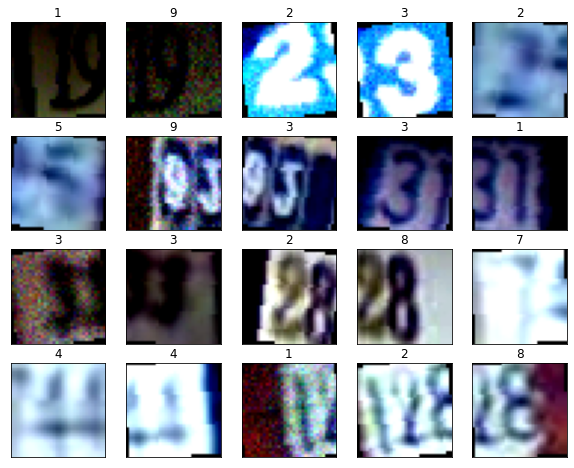

In [83]:
# let's see some of the images
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range - approximately...
    image = image / 2 + 0.5
    image = image.numpy()
    
    # for single channel images 
    if image.shape[0] == 1:
      return np.squeeze(image)
    
    # for images with more than 1 channel
    elif image.shape[0] > 1:
      return image.transpose(1, 2, 0)

def grid_plot(images, labels, nclos=5):
  # plot a grid of images of shape (len(images) / ncols, ncols)
  nrows = np.int(np.ceil(len(labels) / ncols))

  # plot images with labels
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2 * ncols, 2 * nrows))
  for idx, image in enumerate(images):
    if len(axes.shape) == 1:
      axes[idx].imshow(convert_to_imshow_format(image))
      axes[idx].set_title(CLASSES[labels[idx].item()])
      axes[idx].set_xticks([])
      axes[idx].set_yticks([])
    else:  
      i, j = np.unravel_index(idx, (nrows, ncols))
      axes[i, j].imshow(convert_to_imshow_format(image))
      axes[i, j].set_title(CLASSES[labels[idx].item()])
      axes[i, j].set_xticks([])
      axes[i, j].set_yticks([])

trainloader = DataLoader(train_set, batch_size=20, shuffle=False)
dataiter = iter(trainloader)
images, labels = dataiter.next()
grid_plot(images, labels)

0.6684918999671936

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/